### 2 simple ways to get data from Quandl ###

Quandl is a very useful service for free and paid data. It is essentially an centralised market place of data from various sources. An advantage of this is that you can access data by simply getting familiar with Quandl's API, as opposed to having to tinker around with the APIs of multiple data providers. 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

Let's first use Quandl's Python API. It's super simple.

We can get some data without credentials, but limited to 50 calls per day.

In [3]:
import quandl

data = quandl.get("BOE/XUDLGPD") #effective Fed Fund rates
                  
# Get more tickers from https://www.quandl.com/browse

In [4]:
data.head(3)

,Value
Date,
1979-01-02,226.80
1979-01-03,218.60
1979-01-04,223.15


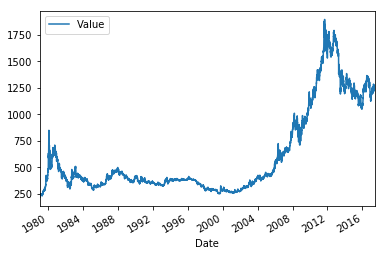

In [5]:
data.plot()

Another way to get data from Quandl is to use its web API. A little (just a little more) troublesome, but this allows for a lot more flexibility.

In [6]:
import pandas as pd
import requests # requests is a very useful library for downloading things from the web

In [21]:
def download_data_from_quandl(ticker):

    # Construct the API call from the contract and auth_token
    api_call = "http://www.quandl.com/api/v1/datasets/"
    api_call += "%s.csv" % ticker 
    # You can download data without a token, but just less.
    # insert token below to increase your quota
    params = "?sort_order=asc"
    #params = "?auth_token=MY_AUTH_TOKEN&sort_order=asc"
    full_url = "%s%s" % (api_call, params)
    # Download the data from Quandl
    data = requests.get(full_url).text
    ticker_str = ticker.replace('/','_')
    filename = "%s.csv" % ticker_str
    with open(filename, 'w') as f:
        for line in data:
            f.write(line)

In [22]:
symbol='BOE/XUDLGPD'

data = download_data_from_quandl('BOE/XUDLGPD')

In [23]:
returned_data = pd.read_csv('BOE_XUDLGPD.csv')

In [24]:
returned_data.head()

,Date,Value
0,1979-01-02,226.80
1,1979-01-03,218.60
2,1979-01-04,223.15
3,1979-01-05,225.50
4,1979-01-08,223.10
